In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Allow image embeding in notebook
%matplotlib inline

/home/daria/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_dir = '/home/daria/Documents/traffic_sighs/Training'

In [60]:
images = [] 
labels = []
path = '/home/daria/Documents/traffic_sighs/Training' 
files = os.listdir(path)

for d in os.listdir(path):
    for file in os.listdir(os.path.join(path,d)):
        if file.endswith(".ppm"):
            images.append(skimage.data.imread(os.path.join(path,d,file)))
            labels.append(int(d))

In [15]:
def fig_img(images, labels):
    fig, ax = plt.subplots(7,8, sharex='col', sharey='row', figsize=(15,15))

    count = 1
    for i in range(7):
        for j in range(8):
            ax[i, j].imshow(images[labels.index(count)])
            count+=1
    ax;

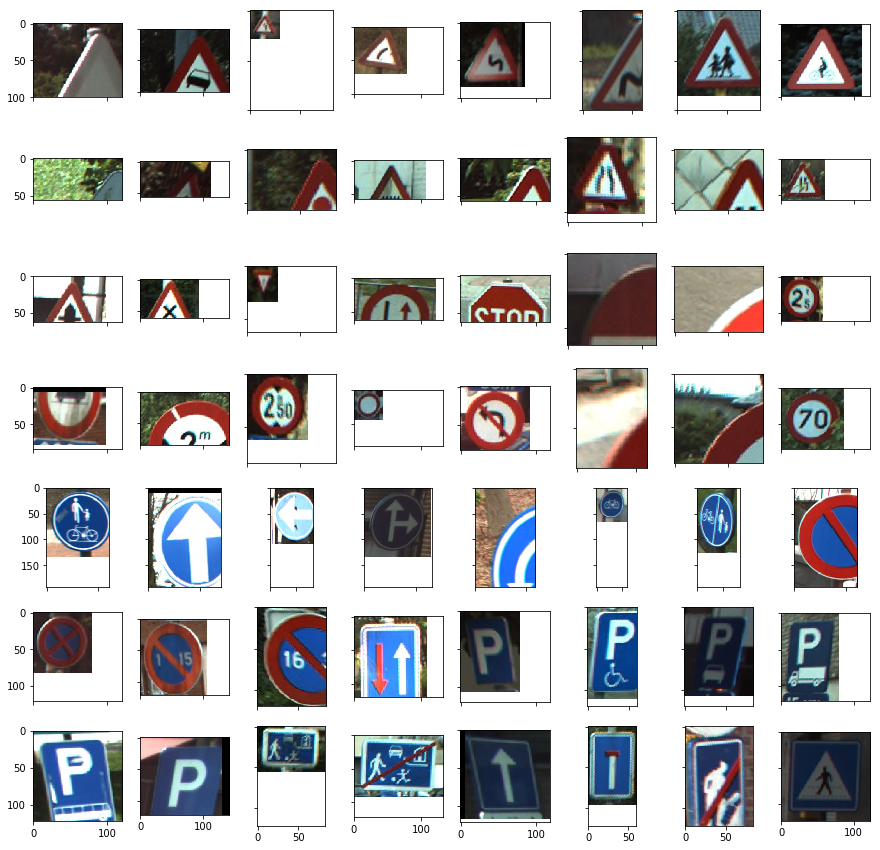

In [16]:
fig_img(images, labels)

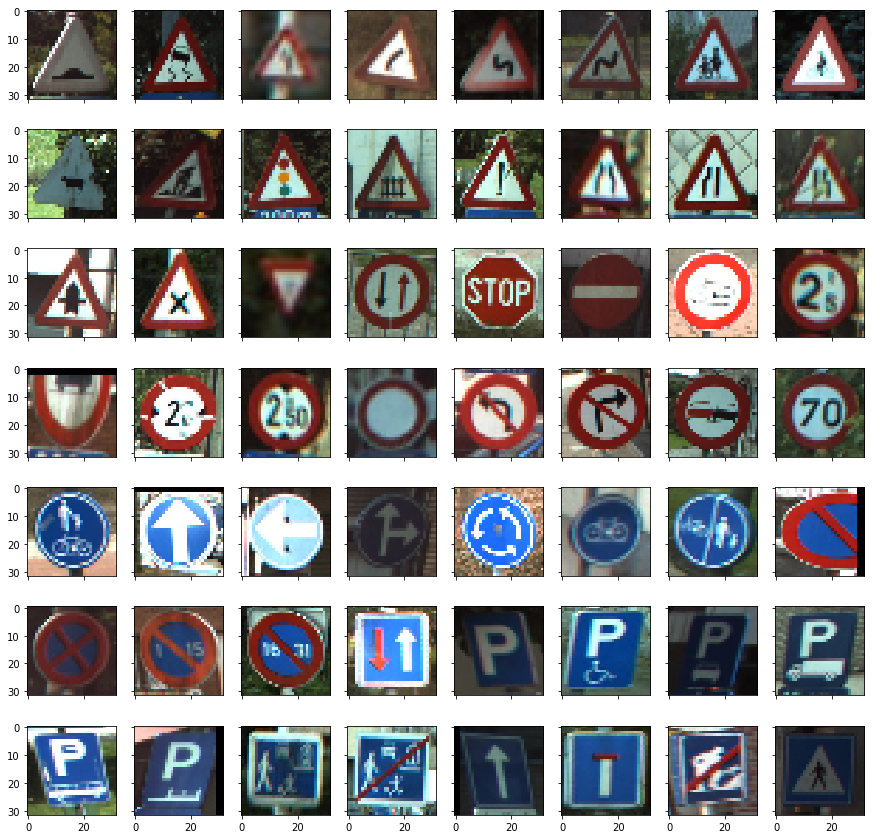

In [61]:
images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images]
fig_img(images32, labels)

In [62]:
import collections
import pandas as pd
import numpy as np
classes_freq = pd.DataFrame()
classes_freq['labels'] = list(collections.Counter(labels).keys())
classes_freq['values'] = list(collections.Counter(labels).values())
classes_freq =classes_freq.sort_values(by = ['values'])

In [63]:
classes_freq.head(5)

,labels,values
18,26,6
13,11,7
46,16,9
47,15,9
33,60,9


In [64]:
classes_freq.tail(5)

,labels,values
56,40,242
19,61,282
6,38,285
23,32,316
26,22,375


In [80]:
images_test = [] 
labels_test = []
path = '/home/daria/Documents/traffic_sighs/Testing' 
files = os.listdir(path)

for d in os.listdir(path):
    for file in os.listdir(os.path.join(path,d)):
        if file.endswith(".ppm"):
            images_test.append(skimage.data.imread(os.path.join(path,d,file)))
            labels_test.append(int(d))

In [66]:
images32_test = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images_test]

In [83]:
classes_freq_test = pd.DataFrame()
classes_freq_test['labels'] = list(collections.Counter(labels_test).keys())
classes_freq_test['values'] = list(collections.Counter(labels_test).values())
classes_freq_test =classes_freq_test.sort_values(by = ['values'])

In [84]:
classes_freq_test.head(5)

,labels,values
0,51,3
2,12,3
29,44,3
37,5,3
11,49,3


In [85]:
classes_freq_test.tail(5)

,labels,values
49,35,154
42,19,163
4,17,183
5,38,213
19,32,422


In [92]:
all_df = pd.merge(classes_freq, classes_freq_test, how='left', on=['labels'], sort = True)
all_df = all_df.fillna(0)
all_df.head(5)

,labels,values_x,values_y
0,0,15,6.0
1,1,110,27.0
2,2,13,7.0
3,3,15,6.0
4,4,15,12.0


In [50]:
import scipy
from scipy.stats import spearmanr

In [93]:
spearmanr(all_df.values_x, all_df.values_y)

SpearmanrResult(correlation=0.7663983371331398, pvalue=3.8792201045885856e-13)

In [94]:
from skimage import data, exposure, img_as_float

In [101]:
def image_to_grey(dataset):
    for i in range(0, len(dataset)):
        new_set = exposure.equalize_adapthist(dataset[i])
    return new_set

In [103]:
images32_grey = image_to_grey(images32)

In [108]:
images32_grey_test = image_to_grey(images32_test)

In [ ]:
fig_img(images32_grey_test, labels_test)